Step Activation (AND): Converged in 130 epochs. Final weights: [-0.1   0.1   0.05]


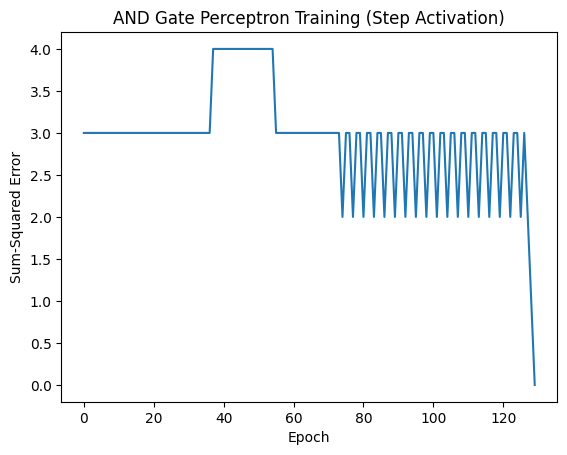

Bipolar Step Activation (AND): Converged in 1000 epochs. Final weights: [-0.1   0.1   0.05]
Sigmoid Activation (AND): Converged in 1000 epochs. Final weights: [-6.13531308  3.97083321  3.96394835]
ReLU Activation (AND): Converged in 390 epochs. Final weights: [-0.92774472  0.95116001  0.94981086]


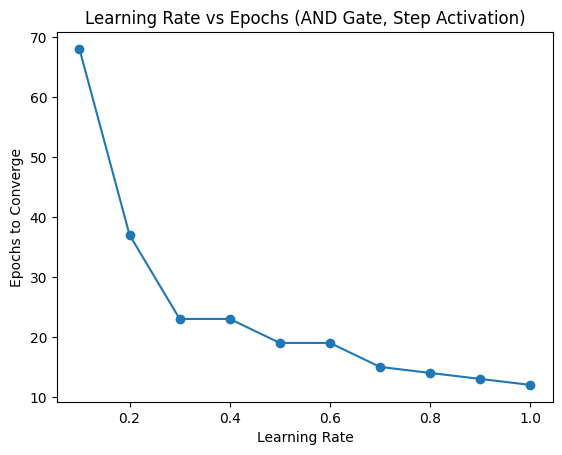

Step Activation (XOR): Converged in 1000 epochs. Final weights: [ 0.1 -0.1 -0.1]


Saving Cancer_Data.csv to Cancer_Data.csv
Cancer Data (Sigmoid): Converged in 1000 epochs. Final weights: [-37.84923441   1.77313051   0.62690514]
Pseudo-inverse weights: [-1.35169389  0.09136515  0.02247502]


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# --- Activation Functions ---
def step(x):
    return 1 if x >= 0 else 0

def bipolar_step(x):
    return 1 if x >= 0 else -1

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def tanh(x):
    return np.tanh(x)

def relu(x):
    return max(0, x)

def leaky_relu(x, alpha=0.01):
    return x if x > 0 else alpha * x

# --- Summation Unit ---
def summation(inputs, weights):
    return np.dot(inputs, weights)

# --- Comparator (Sum-Squared Error) ---
def sum_squared_error(y_true, y_pred):
    return np.sum((y_true - y_pred) ** 2)

# --- Perceptron Learning ---
def perceptron_train(X, y, weights, lr, activation_func, max_epochs=1000, tol=0.002):
    errors = []
    for epoch in range(max_epochs):
        total_error = 0
        for i in range(len(X)):
            summ = summation(X[i], weights)
            output = activation_func(summ)
            error = y[i] - output
            weights += lr * error * X[i]
            total_error += error ** 2
        errors.append(total_error)
        if total_error <= tol:
            break
    return weights, errors, epoch+1

# --- Main Program ---
if __name__ == "__main__":
    # AND Gate Data
    X_and = np.array([[1,0,0], [1,0,1], [1,1,0], [1,1,1]])  # bias, A, B
    y_and = np.array([0, 0, 0, 1])

    # Initial weights and learning rate
    w_init = np.array([10, 0.2, -0.75])
    lr = 0.05

    # A2: Train Perceptron with Step Activation for AND Gate
    weights, errors, epochs = perceptron_train(X_and, y_and, w_init.copy(), lr, step)
    print(f"Step Activation (AND): Converged in {epochs} epochs. Final weights: {weights}")
    plt.plot(errors)
    plt.xlabel("Epoch")
    plt.ylabel("Sum-Squared Error")
    plt.title("AND Gate Perceptron Training (Step Activation)")
    plt.show()

    # A3: Compare with other activations
    activations = {'Bipolar Step': bipolar_step, 'Sigmoid': sigmoid, 'ReLU': relu}
    for name, func in activations.items():
        weights, errors, epochs = perceptron_train(X_and, y_and, w_init.copy(), lr, func)
        print(f"{name} Activation (AND): Converged in {epochs} epochs. Final weights: {weights}")

    # A4: Vary learning rate
    lrs = np.arange(0.1, 1.1, 0.1)
    epoch_counts = []
    for lr_val in lrs:
        _, _, epochs = perceptron_train(X_and, y_and, w_init.copy(), lr_val, step)
        epoch_counts.append(epochs)
    plt.plot(lrs, epoch_counts, marker='o')
    plt.xlabel("Learning Rate")
    plt.ylabel("Epochs to Converge")
    plt.title("Learning Rate vs Epochs (AND Gate, Step Activation)")
    plt.show()

    # A5: Repeat for XOR Gate
    X_xor = np.array([[1,0,0], [1,0,1], [1,1,0], [1,1,1]])
    y_xor = np.array([0, 1, 1, 0])
    weights, errors, epochs = perceptron_train(X_xor, y_xor, w_init.copy(), lr, step)
    print(f"Step Activation (XOR): Converged in {epochs} epochs. Final weights: {weights}")

    from google.colab import files
    uploaded = files.upload()

    # A6: Cancer_Data.csv - Perceptron for Classification
    df = pd.read_csv("Cancer_Data.csv")
    # For demo, use radius_mean and texture_mean as features, diagnosis as target (M=1, B=0)
    df['diagnosis'] = df['diagnosis'].map({'M':1, 'B':0})
    X_cancer = df[['radius_mean', 'texture_mean']].values
    X_cancer = np.hstack([np.ones((X_cancer.shape[0], 1)), X_cancer])  # Add bias
    y_cancer = df['diagnosis'].values
    w_cancer_init = np.zeros(X_cancer.shape[1])
    weights, errors, epochs = perceptron_train(X_cancer, y_cancer, w_cancer_init, 0.01, sigmoid)
    print(f"Cancer Data (Sigmoid): Converged in {epochs} epochs. Final weights: {weights}")

    # A7: Compare with pseudo-inverse
    X_pinv = np.linalg.pinv(X_cancer)
    w_pinv = X_pinv @ y_cancer
    print(f"Pseudo-inverse weights: {w_pinv}")
